In [75]:
import argparse, json, time, random
import hashlib, torch, math, pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from task_and_training import *
import os

Occasional outlieas are removed when the network did not learn


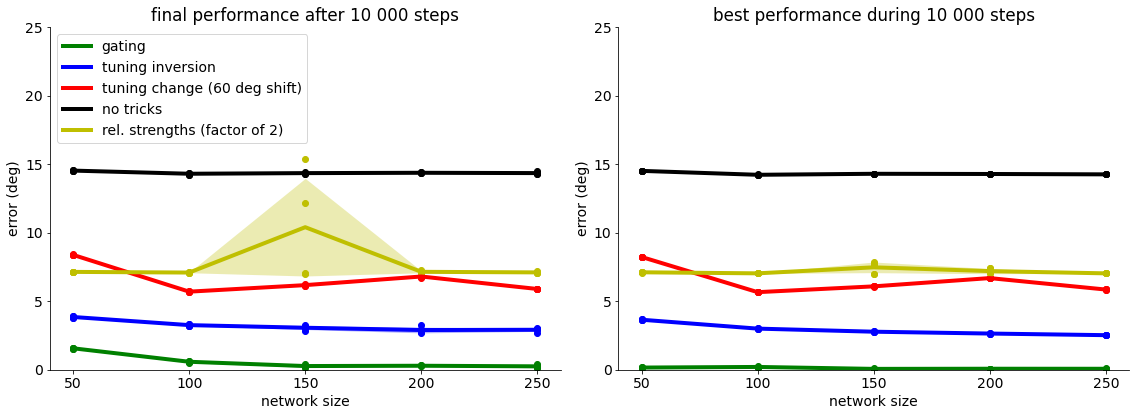

In [107]:
dim_recurrents = [50, 100, 150, 200, 250]
randoms = [1, 2, 3, 4, 5]
best_errors = torch.zeros(len(randoms), len(dim_recurrents))
final_errors = torch.zeros(len(randoms), len(dim_recurrents))


fig = plt.figure(figsize=(16, 6))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
ax_f = fig.add_subplot(1, 2, 1)
ax_b = fig.add_subplot(1, 2, 2)

def _plot(network, label, color):
    for i, dim_recurrent in enumerate(dim_recurrents):
        for j, random in enumerate(randoms):
            t = ""
            if network=="rchange": t += "_sa60.0"
            if network=="relstrengths": t += "_mf2.0"
            #t = ""
            if network=="train": 
                t += "_la0"
                random = "r"+str(random)
            directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}{t}_r{random}/"
            if not os.path.exists(f"{directory}info.json"):
                final_errors[j, i] = float('nan')
                best_errors[j, i] = float('nan')
                print(directory)
                continue
            with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
                js = json.load(f)
            final_errors[j, i] = js["errors"][2]
            best_errors[j, i] = js["errors"][6] 
    # outliers
    if network == "gating":
        final_errors[3, 3] = float('nan')
        best_errors[3, 3] = float('nan')
    if network == "relstrengths":
        final_errors[final_errors>30] = float('nan')
    # plot
    mean = torch.nanmean(best_errors, dim=0) 
    sd = (torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5
    ax_b.scatter(torch.tensor(dim_recurrents).repeat(len(dim_recurrents), 1), best_errors, color=color)
    ax_b.fill_between(dim_recurrents, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_b.plot(dim_recurrents, mean, "-", linewidth=4, label=label, color=color)
    mean = torch.nanmean(final_errors, dim=0) 
    sd = (torch.nanmean(final_errors**2, dim=0)-mean**2)**0.5
    ax_f.scatter(torch.tensor(dim_recurrents).repeat(len(dim_recurrents), 1), final_errors, color=color)
    ax_f.fill_between(dim_recurrents, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_f.plot(dim_recurrents, mean, "-", linewidth=4, label=label, color=color)

#_plot("train", "trained (100 000 steps)", "c")
_plot("gating", "gating", "g")
_plot("inversion", "tuning inversion", "b")
_plot("rchange", "tuning change (60 deg shift)", "r")
_plot("notricks", "no tricks", "k")
_plot("relstrengths", "rel. strengths (factor of 2)", "y")
    
#if show_line: ax.axhline(y=0.0, color='r', linestyle='--', linewidth=3)
#ax.set_ylim(-ylim, ylim)
#ax.set_xlim(-90, 90)
ax_f.set_title(f"final performance after 10 000 steps")
ax_b.set_title(f"best performance during 10 000 steps")
ax_f.set_xlabel(f"network size")
ax_b.set_xlabel(f"network size")
ax_f.set_ylabel("error (deg)")
ax_b.set_ylabel("error (deg)")
ax_f.spines['top'].set_visible(False)
ax_f.spines['right'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_f.legend(loc=2)
#ax_b.legend(loc=1)
ax_f.set_xticks(dim_recurrents)
ax_b.set_xticks(dim_recurrents)
ax_f.set_ylim(0, 25)
ax_b.set_ylim(0, 25)
plt.tight_layout()
print("Occasional outlieas are removed when the network did not learn")
plt.show()

Occasional outlieas are removed when the network did not learn


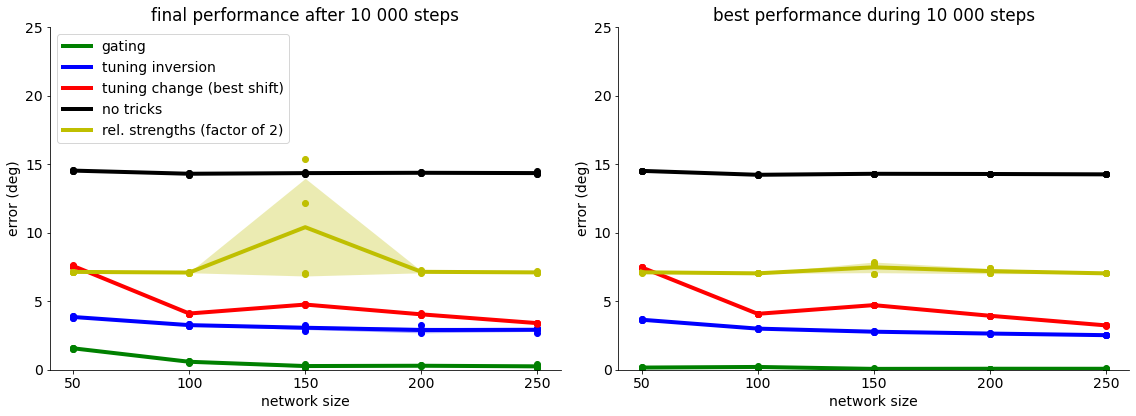

In [111]:
dim_recurrents = [50, 100, 150, 200, 250]
randoms = [1, 2, 3, 4, 5]
best_errors = torch.zeros(len(randoms), len(dim_recurrents))
final_errors = torch.zeros(len(randoms), len(dim_recurrents))


fig = plt.figure(figsize=(16, 6))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
ax_f = fig.add_subplot(1, 2, 1)
ax_b = fig.add_subplot(1, 2, 2)

def _plot(network, label, color):
    for i, dim_recurrent in enumerate(dim_recurrents):
        for j, random in enumerate(randoms):
            t = ""
            if network=="rchange": 
                t += "_sa"
                if dim_recurrent == 50: t += "55"
                if dim_recurrent == 100: t += "70"
                if dim_recurrent == 150: t += "65"
                if dim_recurrent == 200: t += "75"
                if dim_recurrent == 250: t += "85"
                t += ".0"
                random += 5
            if network=="relstrengths": t += "_mf2.0"
            #t = ""
            if network=="train": 
                t += "_la0"
                random = "r"+str(random)
            directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}{t}_r{random}/"
            if not os.path.exists(f"{directory}info.json"):
                final_errors[j, i] = float('nan')
                best_errors[j, i] = float('nan')
                print(directory)
                continue
            with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
                js = json.load(f)
            final_errors[j, i] = js["errors"][2]
            best_errors[j, i] = js["errors"][6] 
    # outliers
    if network == "gating":
        final_errors[3, 3] = float('nan')
        best_errors[3, 3] = float('nan')
    if network == "relstrengths":
        final_errors[final_errors>30] = float('nan')
    if network == "rchange":
        final_errors[final_errors>18] = float('nan')
        best_errors[best_errors>18] = float('nan')
    # plot
    mean = torch.nanmean(best_errors, dim=0) 
    sd = (torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5
    ax_b.scatter(torch.tensor(dim_recurrents).repeat(len(dim_recurrents), 1), best_errors, color=color)
    ax_b.fill_between(dim_recurrents, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_b.plot(dim_recurrents, mean, "-", linewidth=4, label=label, color=color)
    mean = torch.nanmean(final_errors, dim=0) 
    sd = (torch.nanmean(final_errors**2, dim=0)-mean**2)**0.5
    ax_f.scatter(torch.tensor(dim_recurrents).repeat(len(dim_recurrents), 1), final_errors, color=color)
    ax_f.fill_between(dim_recurrents, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_f.plot(dim_recurrents, mean, "-", linewidth=4, label=label, color=color)

#_plot("train", "trained (100 000 steps)", "c")
_plot("gating", "gating", "g")
_plot("inversion", "tuning inversion", "b")
_plot("rchange", "tuning change (best shift)", "r")
_plot("notricks", "no tricks", "k")
_plot("relstrengths", "rel. strengths (factor of 2)", "y")
    
#if show_line: ax.axhline(y=0.0, color='r', linestyle='--', linewidth=3)
#ax.set_ylim(-ylim, ylim)
#ax.set_xlim(-90, 90)
ax_f.set_title(f"final performance after 10 000 steps")
ax_b.set_title(f"best performance during 10 000 steps")
ax_f.set_xlabel(f"network size")
ax_b.set_xlabel(f"network size")
ax_f.set_ylabel("error (deg)")
ax_b.set_ylabel("error (deg)")
ax_f.spines['top'].set_visible(False)
ax_f.spines['right'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_f.legend(loc=2)
#ax_b.legend(loc=1)
ax_f.set_xticks(dim_recurrents)
ax_b.set_xticks(dim_recurrents)
ax_f.set_ylim(0, 25)
ax_b.set_ylim(0, 25)
plt.tight_layout()
print("Occasional outlieas are removed when the network did not learn")
plt.show()

network size is 100


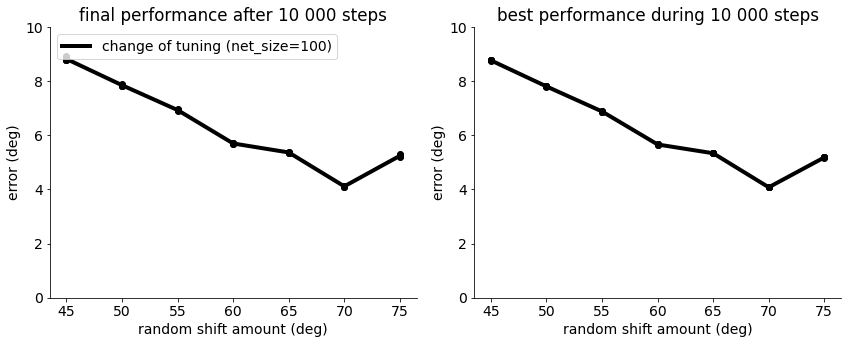

In [91]:
dim_recurrent = 100
shift_amounts = [45, 50, 55, 60, 65, 70, 75]
randoms = [1, 2, 3, 4, 5]
best_errors = torch.zeros(len(randoms), len(shift_amounts))
final_errors = torch.zeros(len(randoms), len(shift_amounts))

network, label, color = "rchange", "change of tuning (net_size=100)", "k"
fig = plt.figure(figsize=(12, 5))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
ax_f = fig.add_subplot(1, 2, 1)
ax_b = fig.add_subplot(1, 2, 2)

for i, shift_amount in enumerate(shift_amounts):
    for j, random in enumerate(randoms):
        directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}_sa{shift_amount:.1f}_r{random}/"
        with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
            js = json.load(f)
        final_errors[j, i] = js["errors"][2]
        best_errors[j, i] = js["errors"][6] 
# plot
mean = torch.nanmean(best_errors, dim=0) 
sd = (torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5
ax_b.scatter(torch.tensor(shift_amounts).repeat(len(randoms), 1), best_errors, color=color)
ax_b.fill_between(shift_amounts, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
ax_b.plot(shift_amounts, mean, "-", linewidth=4, label=label, color=color)
mean = torch.nanmean(final_errors, dim=0) 
sd = (torch.nanmean(final_errors**2, dim=0)-mean**2)**0.5
ax_f.scatter(torch.tensor(shift_amounts).repeat(len(randoms), 1), final_errors, color=color)
ax_f.fill_between(shift_amounts, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
ax_f.plot(shift_amounts, mean, "-", linewidth=4, label=label, color=color)
    
#if show_line: ax.axhline(y=0.0, color='r', linestyle='--', linewidth=3)
#ax.set_ylim(-ylim, ylim)
#ax.set_xlim(-90, 90)
ax_f.set_title(f"final performance after 10 000 steps")
ax_b.set_title(f"best performance during 10 000 steps")
ax_f.set_xlabel(f"random shift amount (deg)")
ax_b.set_xlabel(f"random shift amount (deg)")
ax_f.set_ylabel("error (deg)")
ax_b.set_ylabel("error (deg)")
ax_f.spines['top'].set_visible(False)
ax_f.spines['right'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_f.legend(loc=2)
#ax_b.legend(loc=1)
ax_f.set_xticks(shift_amounts)
ax_b.set_xticks(shift_amounts)
ax_f.set_ylim(0, 10)
ax_b.set_ylim(0, 10)
plt.tight_layout()
print("network size is 100")
plt.show()

network size is 100


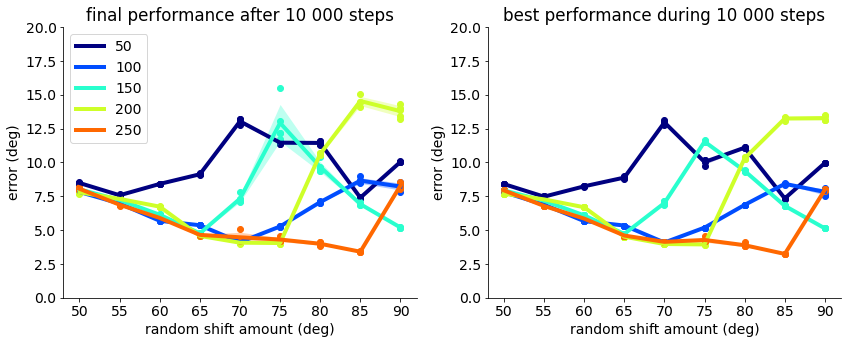

In [105]:
import matplotlib

dim_recurrent = 100
shift_amounts = [50, 55, 60, 65, 70, 75, 80, 85, 90]
randoms = [6, 7, 8, 9, 10]
best_errors = torch.zeros(len(randoms), len(shift_amounts))
final_errors = torch.zeros(len(randoms), len(shift_amounts))

network, label, color = "rchange", "change of tuning (net_size=100)", "k"
fig = plt.figure(figsize=(12, 5))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
ax_f = fig.add_subplot(1, 2, 1)
ax_b = fig.add_subplot(1, 2, 2)

def _plot(dim_recurrent, label, color):
    for i, shift_amount in enumerate(shift_amounts):
        for j, random in enumerate(randoms):
            directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}_sa{shift_amount:.1f}_r{random}/"
            with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
                js = json.load(f)
            final_errors[j, i] = js["errors"][2]
            best_errors[j, i] = js["errors"][6] 
    final_errors[final_errors>17] = float('nan')
    best_errors[best_errors>17] = float('nan')
    # plot
    mean = torch.nanmean(best_errors, dim=0) 
    sd = (torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5
    ax_b.scatter(torch.tensor(shift_amounts).repeat(len(randoms), 1), best_errors, color=color)
    ax_b.fill_between(shift_amounts, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_b.plot(shift_amounts, mean, "-", linewidth=4, label=label, color=color)
    mean = torch.nanmean(final_errors, dim=0) 
    sd = (torch.nanmean(final_errors**2, dim=0)-mean**2)**0.5
    ax_f.scatter(torch.tensor(shift_amounts).repeat(len(randoms), 1), final_errors, color=color)
    ax_f.fill_between(shift_amounts, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_f.plot(shift_amounts, mean, "-", linewidth=4, label=label, color=color)
colors = matplotlib.colors.Colormap("rainbow", N=6)
colors = plt.cm.jet(np.linspace(0,1,6))
for j, a in enumerate([50, 100, 150, 200, 250]):
    _plot(a, str(a), colors[j])
    
#if show_line: ax.axhline(y=0.0, color='r', linestyle='--', linewidth=3)
#ax.set_ylim(-ylim, ylim)
#ax.set_xlim(-90, 90)
ax_f.set_title(f"final performance after 10 000 steps")
ax_b.set_title(f"best performance during 10 000 steps")
ax_f.set_xlabel(f"random shift amount (deg)")
ax_b.set_xlabel(f"random shift amount (deg)")
ax_f.set_ylabel("error (deg)")
ax_b.set_ylabel("error (deg)")
ax_f.spines['top'].set_visible(False)
ax_f.spines['right'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_f.legend(loc=2)
#ax_b.legend(loc=1)
ax_f.set_xticks(shift_amounts)
ax_b.set_xticks(shift_amounts)
ax_f.set_ylim(0, 20)
ax_b.set_ylim(0, 20)
plt.tight_layout()
print("network size is 100")
plt.show()

network size is 100


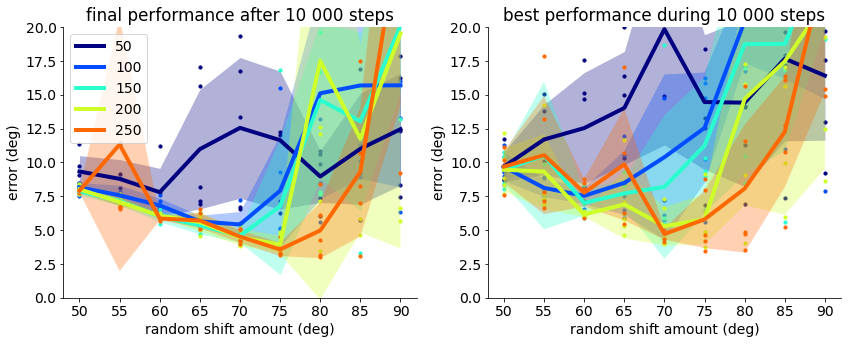

In [233]:
import matplotlib

dim_recurrent = 100
shift_amounts = [50, 55, 60, 65, 70, 75, 80, 85, 90]
randoms = [1, 2, 3, 4, 5]
best_errors = torch.zeros(len(randoms), len(shift_amounts))
final_errors = torch.zeros(len(randoms), len(shift_amounts))

network, label, color = "rchange", "change of tuning (net_size=100)", "k"
fig = plt.figure(figsize=(12, 5))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
ax_f = fig.add_subplot(1, 2, 1)
ax_b = fig.add_subplot(1, 2, 2)

def _plot(dim_recurrent, label, color):
    for i, shift_amount in enumerate(shift_amounts):
        for j, random in enumerate(randoms):
            directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}_sa{shift_amount:.1f}_r{random}/"
            if not os.path.exists(f"{directory}info.json"):
                final_errors[j, i] = float('nan')
                best_errors[j, i] = float('nan')
                print("NO ", directory)
                continue
            with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
                js = json.load(f)
            final_errors[j, i] = js["errors"][2]
            best_errors[j, i] = js["errors"][10] 
    #final_errors[final_errors>20] = float('nan')
    #best_errors[best_errors>20] = float('nan')
    #print(final_errors)
    # plot
    mean = torch.nanmean(best_errors, dim=0) 
    sd = (torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5
    ax_b.scatter(torch.tensor(shift_amounts).repeat(len(randoms), 1), best_errors, 10, color=color)
    ax_b.fill_between(shift_amounts, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_b.plot(shift_amounts, mean, "-", linewidth=4, label=label, color=color)
    mean = torch.nanmean(final_errors, dim=0) 
    sd = (torch.nanmean(final_errors**2, dim=0)-mean**2)**0.5
    ax_f.scatter(torch.tensor(shift_amounts).repeat(len(randoms), 1), final_errors, 10, color=color)
    ax_f.fill_between(shift_amounts, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_f.plot(shift_amounts, mean, "-", linewidth=4, label=label, color=color)
colors = matplotlib.colors.Colormap("rainbow", N=6)
colors = plt.cm.jet(np.linspace(0,1,6))
for j, a in enumerate([50, 100, 150, 200, 250]):
#for j, a in enumerate([200]):
    _plot(a, str(a), colors[j])
    
#if show_line: ax.axhline(y=0.0, color='r', linestyle='--', linewidth=3)
#ax.set_ylim(-ylim, ylim)
#ax.set_xlim(-90, 90)
ax_f.set_title(f"final performance after 10 000 steps")
ax_b.set_title(f"best performance during 10 000 steps")
ax_f.set_xlabel(f"random shift amount (deg)")
ax_b.set_xlabel(f"random shift amount (deg)")
ax_f.set_ylabel("error (deg)")
ax_b.set_ylabel("error (deg)")
ax_f.spines['top'].set_visible(False)
ax_f.spines['right'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_f.legend(loc=2)
#ax_b.legend(loc=1)
ax_f.set_xticks(shift_amounts)
ax_b.set_xticks(shift_amounts)
ax_f.set_ylim(0, 20)
ax_b.set_ylim(0, 20)
plt.tight_layout()
print("network size is 100")
plt.show()

In [210]:
final_errors

tensor([[8.0455, 6.7011, 5.7749, 5.3038, 4.2627, 3.1279, 3.1307,    nan,    nan],
        [7.9681,    nan, 6.0152, 6.5240, 5.0993, 3.6797, 6.1104, 3.0708,    nan],
        [7.7122, 6.7071, 5.6846, 6.2409, 5.0482, 4.4911, 4.2353, 7.0071, 9.1978],
        [   nan, 6.6822, 5.8657, 5.3837, 4.1892, 3.2456, 2.9802, 8.2622,    nan],
        [   nan,    nan, 5.9475,    nan, 4.0066, 3.3147,    nan,    nan,    nan]])

network size is 100


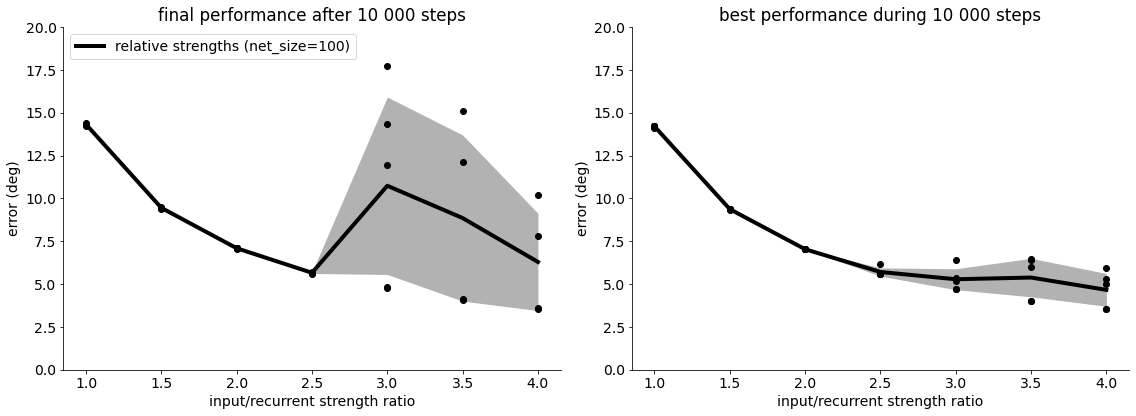

In [88]:
dim_recurrent = 100
magnitude_factors = [1, 1.5, 2, 2.5, 3, 3.5, 4]
randoms = [1, 2, 3, 4, 5]
best_errors = torch.zeros(len(randoms), len(magnitude_factors))
final_errors = torch.zeros(len(randoms), len(magnitude_factors))

network, label, color = "relstrengths", "relative strengths (net_size=100)", "k"
fig = plt.figure(figsize=(16, 6))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
ax_f = fig.add_subplot(1, 2, 1)
ax_b = fig.add_subplot(1, 2, 2)

for i, magnitude_factor in enumerate(magnitude_factors):
    for j, random in enumerate(randoms):
        directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}_mf{magnitude_factor:.1f}_r{random}/"
        with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
            js = json.load(f)
        final_errors[j, i] = js["errors"][2]
        best_errors[j, i] = js["errors"][6] 
    final_errors[final_errors>30] = float('nan')
# plot
mean = torch.nanmean(best_errors, dim=0) 
sd = (torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5
ax_b.scatter(torch.tensor(magnitude_factors).repeat(len(randoms), 1), best_errors, color=color)
ax_b.fill_between(magnitude_factors, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
ax_b.plot(magnitude_factors, mean, "-", linewidth=4, label=label, color=color)
mean = torch.nanmean(final_errors, dim=0) 
sd = (torch.nanmean(final_errors**2, dim=0)-mean**2)**0.5
ax_f.scatter(torch.tensor(magnitude_factors).repeat(len(randoms), 1), final_errors, color=color)
ax_f.fill_between(magnitude_factors, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
ax_f.plot(magnitude_factors, mean, "-", linewidth=4, label=label, color=color)
    
#if show_line: ax.axhline(y=0.0, color='r', linestyle='--', linewidth=3)
#ax.set_ylim(-ylim, ylim)
#ax.set_xlim(-90, 90)
ax_f.set_title(f"final performance after 10 000 steps")
ax_b.set_title(f"best performance during 10 000 steps")
ax_f.set_xlabel(f"input/recurrent strength ratio")
ax_b.set_xlabel(f"input/recurrent strength ratio")
ax_f.set_ylabel("error (deg)")
ax_b.set_ylabel("error (deg)")
ax_f.spines['top'].set_visible(False)
ax_f.spines['right'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_f.legend(loc=2)
#ax_b.legend(loc=1)
ax_f.set_xticks(magnitude_factors)
ax_b.set_xticks(magnitude_factors)
ax_f.set_ylim(0, 20)
ax_b.set_ylim(0, 20)
print("network size is 100")
plt.tight_layout()
plt.show()

In [87]:
final_errors

tensor([[14.3632,  9.4671,  7.1096,  5.6096,  4.7957,  4.1546,  3.5949],
        [14.3208,  9.5083,  7.0773,  5.6467, 14.3611,  4.0924,  3.5636],
        [14.3761,  9.4351,  7.1028, 49.7496, 11.9780, 47.3953, 10.1874],
        [14.3081,  9.3865,  7.0884,  5.6681,  4.8251, 15.0736, 34.4062],
        [14.2271,  9.4479,  7.0856,  5.7142, 17.7349, 12.1024,  7.8323]])

In [273]:

ans = {}

In [269]:
ans_n = ans

In [299]:
ans_nn = ans

In [300]:
ans = ans_n

In [274]:
import matplotlib
import importlib.util 

dim_recurrent = 100
shift_amounts = [50, 55, 60, 65, 70, 75, 80, 85, 90]
randoms = [1, 2, 3, 4, 5]

network size is 100


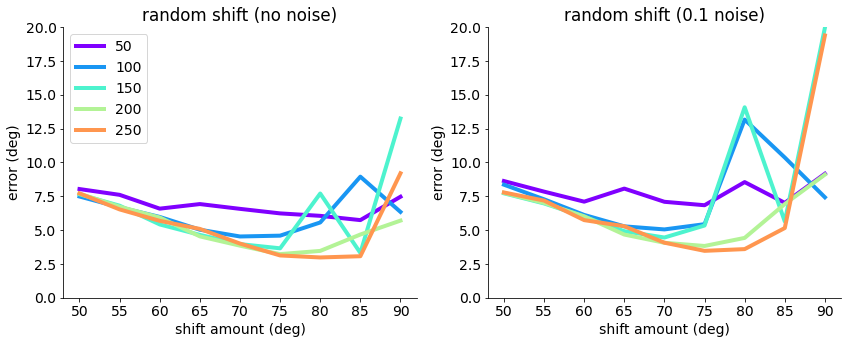

In [303]:
network, label, color = "rchange", "change of tuning (net_size=100)", "k"
fig = plt.figure(figsize=(12, 5))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
ax_f = fig.add_subplot(1, 2, 1)
ax_b = fig.add_subplot(1, 2, 2)

def _plot(dim_recurrent, label, color):
    if dim_recurrent not in ans:
        best_errors = torch.zeros(len(randoms), len(shift_amounts))
        final_errors = torch.zeros(len(randoms), len(shift_amounts))
        for i, shift_amount in enumerate(shift_amounts):
            for j, random in enumerate(randoms):
                directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}_sa{shift_amount:.1f}_r{random}/"
                if not os.path.exists(f"{directory}info.json"):
                    final_errors[j, i] = float('nan')
                    best_errors[j, i] = float('nan')
                    print("NO ", directory)
                    continue
                #with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
                #    js = json.load(f)
                #final_errors[j, i] = js["errors"][2]
                #best_errors[j, i] = js["errors"][6] 

                # BEGIN ANALYSIS CODE COPY
                orientation_resolution = 6  # resolution to sample angles at (0, ORI_RES, 2*ORI_RES, ..., 180)
                analyze_network = "final"  # options: "best", "final", <parameter update step no>
                noise_amplitude = 0.0  # if run analyses with noise, noise amplitude
                with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
                    jj = json.load(f)
                hyperparameters = jj["hyperparameters"]
                task_parameters = jj["task_parameters"]
                model_parameters = jj["model_parameters"]
                additional_comments = jj["additional_comments"]
                directory = jj["directory"]
                
                spec = importlib.util.spec_from_file_location(
                    name="model_module"+str(hash(directory)),  # note that ".test" is not a valid module name
                    location=directory+"task_and_training.py",
                )
                model_module = importlib.util.module_from_spec(spec)
                spec.loader.exec_module(model_module)

                model = model_module.Model()
                #print(model.parameters)
                if analyze_network.lower() == "best": network_filename = "model_best.pth"
                elif analyze_network.lower() == "final": network_filename = f"model_parameterupdate{hyperparameters['train_for_steps']}.pth"
                else: network_filename = f"model_parameterupdate{analyze_network}.pth"
                model_state_dict = torch.load(directory+network_filename, map_location=torch.device('cpu'))["model_state_dict"]
                model.load_state_dict(model_state_dict)

                ORI_RES = orientation_resolution
                ORI_SET = torch.arange(0, 180, ORI_RES)
                ORI_SET_SIZE = ORI_SET.shape[0]

                # fix delays at median values for analysis
                delay0, delay1, delay2 = Task.get_median_delays()
                show_orientation_for = task_parameters["show_orientation_for"]
                show_cue_for = task_parameters["show_cue_for"]
                total_time = show_orientation_for*2+show_cue_for+delay0+delay1+delay2
                t1, t1d = delay0, "before O1 presented"
                t1_5, t1_5d = delay0+show_orientation_for//2, "amid 01 presentation"
                t2, t2d = delay0+show_orientation_for, "after O1 presented"
                t3, t3d = delay0+show_orientation_for+delay1, "before O2 presented"
                t3_5, t3_5d = delay0+show_orientation_for+delay1+show_orientation_for//2, "amid O2 presentation"
                t4, t4d = delay0+show_orientation_for+delay1+show_orientation_for, "after O2 presented"
                t5, t5d = delay0+show_orientation_for+delay1+show_orientation_for+delay2, "before go cue"
                t6, t6d = total_time-1, "at end of task"

                # run the model on all possible orientations 
                ao_input, ao_target, ao_mask = model_module.Task.make_all_integer_orientations_batch(delay0, delay1, delay2, orientation_resolution)
                ao_noise_mask = model_module.Task.get_noise_mask(delay0, delay1, delay2)
                ao_noise_mask = ao_noise_mask.repeat(ao_input.shape[0], 1).unsqueeze(2).repeat(1, 1, model.dim_recurrent)  # convert to (batch_size, total_time, dim_recurrent)
                ao_noise = torch.randn_like(ao_noise_mask) * ao_noise_mask * noise_amplitude
                ao_output, ao_h = model.forward(ao_input, noise=ao_noise)

                # for every timestep and every unit, calculate its activity in all trials
                #ao_data = torch.zeros((total_time, model.dim_recurrent, ORI_SET_SIZE, ORI_SET_SIZE))
                #for orientation1 in range(ORI_SET_SIZE):
                #    for orientation2 in range(ORI_SET_SIZE):
                #        o = ao_h[orientation1 * ORI_SET_SIZE + orientation2]
                #        ao_data[:, :, orientation1, orientation2] = o

                # detach from autograd
                ao_output = ao_output.detach()
                ao_h = ao_h.detach()
                #ao_data = ao_data.detach()
                mse_o1, mse_o2, err_o1, err_o2 = model_module.Task.calculate_errors(ao_target, ao_output, ao_mask, t5, t6)
                #print(err_o1)
                final_errors[j, i] = err_o1
                best_errors[j, i] = 0
                print(directory)
                ans[dim_recurrent] = final_errors.detach().clone()
    else:
        final_errors = ans[dim_recurrent].clone()
        best_errors = torch.zeros(len(randoms), len(shift_amounts))
        #if dim_recurrent == 250:
        #    final_errors[final_errors>25] = float('nan')
        #if dim_recurrent == 150:
        #    final_errors[final_errors>35] = float('nan')

    best_errors = torch.zeros(len(randoms), len(shift_amounts))
    for i, shift_amount in enumerate(shift_amounts):
        for j, random in enumerate(randoms):
            directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}_sa{shift_amount:.1f}_r{random}/"
            if not os.path.exists(f"{directory}info.json"):
                final_errors[j, i] = float('nan')
                best_errors[j, i] = float('nan')
                print("NO ", directory)
                continue
            with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
                js = json.load(f)
            #final_errors[j, i] = js["errors"][2]
            best_errors[j, i] = js["errors"][2] 
    #best_errors[best_errors>20] = float('nan')
            
    #final_errors[final_errors>17] = float('nan')
    #best_errors[best_errors>17] = float('nan')
    # plot
    mean = torch.nanmean(best_errors, dim=0) 
    sd = (torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5
    #ax_b.scatter(torch.tensor(shift_amounts).repeat(len(randoms), 1), best_errors, 10, color=color)
    #ax_b.fill_between(shift_amounts, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    #ax_b.plot(shift_amounts, mean, "-", linewidth=4, label=label, color=color)
    ax_f.plot(shift_amounts, torch.min(torch.nan_to_num(best_errors, nan=1000), dim=0).values, "-", linewidth=4, label=label, color=color)
    mean = torch.nanmean(final_errors, dim=0) 
    sd = (torch.nanmean(final_errors**2, dim=0)-mean**2)**0.5
    #ax_f.scatter(torch.tensor(shift_amounts).repeat(len(randoms), 1), final_errors, 10, color=color)
    #ax_f.fill_between(shift_amounts, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    #ax_f.plot(shift_amounts, mean, "-", linewidth=4, label=label, color=color)
    ax_b.plot(shift_amounts, torch.min(torch.nan_to_num(final_errors, nan=1000), dim=0).values, "-", linewidth=4, label=label, color=color)
colors = matplotlib.colors.Colormap("rainbow", N=7)
colors = plt.cm.rainbow(np.linspace(0,1,6))
for j, a in enumerate([50, 100, 150, 200, 250]):
    _plot(a, str(a), colors[j])
    
#if show_line: ax.axhline(y=0.0, color='r', linestyle='--', linewidth=3)
#ax.set_ylim(-ylim, ylim)
#ax.set_xlim(-90, 90)
ax_f.set_title(f"random shift (no noise)")
ax_b.set_title(f"random shift (0.1 noise)")
ax_f.set_xlabel(f"shift amount (deg)")
ax_b.set_xlabel(f"shift amount (deg)")
ax_f.set_ylabel("error (deg)")
ax_b.set_ylabel("error (deg)")
ax_f.spines['top'].set_visible(False)
ax_f.spines['right'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_f.legend(loc=2)
#ax_b.legend(loc=1)
ax_f.set_xticks(shift_amounts)
ax_b.set_xticks(shift_amounts)
ax_f.set_ylim(0, 20)
ax_b.set_ylim(0, 20)
plt.tight_layout()
print("network size is 100")
plt.show()

In [179]:
dim_recurrents = [50, 100, 150, 200, 250]
randoms = [1, 2, 3, 4, 5]
anss = {}

In [198]:
dim_recurrents = [50, 100, 150, 200, 250]
randoms = [1, 2, 3, 4, 5]

Occasional outlieas are removed when the network did not learn


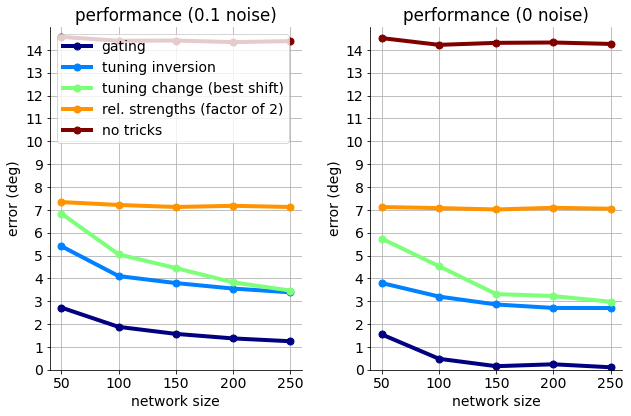

In [324]:
fig = plt.figure(figsize=(9, 6))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
ax_f = fig.add_subplot(1, 2, 1)
ax_b = fig.add_subplot(1, 2, 2)

def _plot(network, label, color):
    def _getdir(network, dim_recurrent, random, noise=False):
        t = ""
        if network=="rchange": 
            t += "_sa"
            if noise:
                if dim_recurrent == 50: t += "75"
                if dim_recurrent == 100: t += "70"
                if dim_recurrent == 150: t += "65"
                if dim_recurrent == 200: t += "70"
                if dim_recurrent == 250: t += "70"
            else:
                if dim_recurrent == 50: t += "55"
                if dim_recurrent == 100: t += "70"
                if dim_recurrent == 150: t += "65"
                if dim_recurrent == 200: t += "75"
                if dim_recurrent == 250: t += "85"
            t += ".0"
            random += 5
        if network=="relstrengths": t += "_mf2.0"
        #t = ""
        if network=="train": 
            t += "_la0"
            random = "r"+str(random)
        directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}{t}_r{random}/"
        return directory
    best_errors = torch.zeros(len(randoms), len(dim_recurrents))
    final_errors = torch.zeros(len(randoms), len(dim_recurrents))
    
    if (network not in anss):
        final_errors = torch.zeros(len(randoms), len(dim_recurrents))
        for i, dim_recurrent in enumerate(dim_recurrents):
            for j, random in enumerate(randoms):
                directory = _getdir(network, dim_recurrent, random, noise=True)
                if not os.path.exists(f"{directory}info.json"):
                    final_errors[j, i] = float('nan')
                    best_errors[j, i] = float('nan')
                    print("NO ", directory)
                    continue
                with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
                    jj = json.load(f)
                hyperparameters = jj["hyperparameters"]
                task_parameters = jj["task_parameters"]
                model_parameters = jj["model_parameters"]
                additional_comments = jj["additional_comments"]
                directory = jj["directory"]
                # fix the py file (relevant only once)
                shutil.copy(f"task_and_training_hd{network}.py", directory + "task_and_training.py")
                with open(directory + "task_and_training.py", "r+") as f:
                    data = f.read()
                    parser_start = data.index("# PARSER START")
                    parser_end = data.index("# PARSER END")
                    data = data[0:parser_start:] + data[parser_end::]
                    sa = ""
                    if dim_recurrent == 50: sa += "75"
                    if dim_recurrent == 100: sa += "70"
                    if dim_recurrent == 150: sa += "65"
                    if dim_recurrent == 200: sa += "70"
                    if dim_recurrent == 250: sa += "70"
                    if sa != "": sa = int(sa)
                    argmap = {
                        "net_size": dim_recurrent,
                        "random": random+5 if network=="rchange" else random,
                        "shift_amount": sa,
                        "magnitude_factor": 2.0,
                    }
                    for arg, attr in argmap.items():
                        replace = f"args.{arg}"
                        replaceWith = f"{attr}"
                        if type(attr)==str:
                            replaceWith = '"' + replaceWith + '"'
                        data = data.replace(replace, replaceWith)
                    data = data.replace("""hyperparameters["random_seed"])""", str(hyperparameters["random_seed"])+")") # fix error with wrong seeds
                    f.seek(0)
                    f.write(data)
                    f.truncate()
                spec = importlib.util.spec_from_file_location(
                    name="model_module"+str(hash(directory)),  # note that ".test" is not a valid module name
                    location=directory+"task_and_training.py",
                )
                model_module = importlib.util.module_from_spec(spec)
                spec.loader.exec_module(model_module)

                # BEGIN ANALYSIS CODE COPY
                orientation_resolution = 6  # resolution to sample angles at (0, ORI_RES, 2*ORI_RES, ..., 180)
                analyze_network = "final"  # options: "best", "final", <parameter update step no>
                noise_amplitude = 0.1  # if run analyses with noise, noise amplitude
                with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
                    jj = json.load(f)
                hyperparameters = jj["hyperparameters"]
                task_parameters = jj["task_parameters"]
                model_parameters = jj["model_parameters"]
                additional_comments = jj["additional_comments"]
                directory = jj["directory"]
                model = model_module.Model()
                #print(model.parameters)
                if analyze_network.lower() == "best": network_filename = "model_best.pth"
                elif analyze_network.lower() == "final": network_filename = f"model_parameterupdate{hyperparameters['train_for_steps']}.pth"
                else: network_filename = f"model_parameterupdate{analyze_network}.pth"
                model_state_dict = torch.load(directory+network_filename, map_location=torch.device('cpu'))["model_state_dict"]
                model.load_state_dict(model_state_dict)

                ORI_RES = orientation_resolution
                ORI_SET = torch.arange(0, 180, ORI_RES)
                ORI_SET_SIZE = ORI_SET.shape[0]

                # fix delays at median values for analysis
                delay0, delay1, delay2 = Task.get_median_delays()
                show_orientation_for = task_parameters["show_orientation_for"]
                show_cue_for = task_parameters["show_cue_for"]
                total_time = show_orientation_for*2+show_cue_for+delay0+delay1+delay2
                t1, t1d = delay0, "before O1 presented"
                t1_5, t1_5d = delay0+show_orientation_for//2, "amid 01 presentation"
                t2, t2d = delay0+show_orientation_for, "after O1 presented"
                t3, t3d = delay0+show_orientation_for+delay1, "before O2 presented"
                t3_5, t3_5d = delay0+show_orientation_for+delay1+show_orientation_for//2, "amid O2 presentation"
                t4, t4d = delay0+show_orientation_for+delay1+show_orientation_for, "after O2 presented"
                t5, t5d = delay0+show_orientation_for+delay1+show_orientation_for+delay2, "before go cue"
                t6, t6d = total_time-1, "at end of task"

                # run the model on all possible orientations 
                ao_input, ao_target, ao_mask = model_module.Task.make_all_integer_orientations_batch(delay0, delay1, delay2, orientation_resolution)
                ao_noise_mask = model_module.Task.get_noise_mask(delay0, delay1, delay2)
                ao_noise_mask = ao_noise_mask.repeat(ao_input.shape[0], 1).unsqueeze(2).repeat(1, 1, model.dim_recurrent)  # convert to (batch_size, total_time, dim_recurrent)
                ao_noise = torch.randn_like(ao_noise_mask) * ao_noise_mask * noise_amplitude
                ao_output, ao_h = model.forward(ao_input, noise=ao_noise)

                # for every timestep and every unit, calculate its activity in all trials
                #ao_data = torch.zeros((total_time, model.dim_recurrent, ORI_SET_SIZE, ORI_SET_SIZE))
                #for orientation1 in range(ORI_SET_SIZE):
                #    for orientation2 in range(ORI_SET_SIZE):
                #        o = ao_h[orientation1 * ORI_SET_SIZE + orientation2]
                #        ao_data[:, :, orientation1, orientation2] = o

                # detach from autograd
                ao_output = ao_output.detach()
                ao_h = ao_h.detach()
                #ao_data = ao_data.detach()
                mse_o1, mse_o2, err_o1, err_o2 = model_module.Task.calculate_errors(ao_target, ao_output, ao_mask, t5, t6)
                #print(err_o1)
                final_errors[j, i] = err_o1
                #best_errors[j, i] = 0
                print(directory)
                anss[network] = final_errors.detach().clone()
    else:
        final_errors = anss[network].clone()
    
    best_errors = torch.zeros(len(randoms), len(dim_recurrents))
    for i, dim_recurrent in enumerate(dim_recurrents):
        for j, random in enumerate(randoms):
            directory = _getdir(network, dim_recurrent, random)
            if not os.path.exists(f"{directory}info.json"):
                final_errors[j, i] = float('nan')
                best_errors[j, i] = float('nan')
                #print(directory)
                continue
            with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
                js = json.load(f)
            best_errors[j, i] = js["errors"][2]
            #best_errors[j, i] = js["errors"][6] 
    # outliers
    # plot
    #print(best_errors)
    best_errors[best_errors>20]=float('nan')
    final_errors[final_errors>20]=float('nan')
    
    
    
    mean = torch.nanmean(best_errors, dim=0) 
    sd = (torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5
    #ax_b.scatter(torch.tensor(dim_recurrents).repeat(len(dim_recurrents), 1), best_errors, color=color)
    #ax_b.fill_between(dim_recurrents, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    #ax_b.plot(dim_recurrents, mean, "-", linewidth=4, label=label, color=color)
    ax_b.plot(dim_recurrents, torch.min(torch.nan_to_num(best_errors, nan=1000), dim=0).values, "-", marker='o', markersize=7, linewidth=4, label=label, color=color)
    mean = torch.nanmean(final_errors, dim=0) 
    sd = (torch.nanmean(final_errors**2, dim=0)-mean**2)**0.5
    #ax_f.scatter(torch.tensor(dim_recurrents).repeat(len(dim_recurrents), 1), final_errors, color=color)
    #ax_f.fill_between(dim_recurrents, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    #ax_f.plot(dim_recurrents, mean, "-", linewidth=4, label=label, color=color)
    ax_f.plot(dim_recurrents, torch.min(torch.nan_to_num(final_errors, nan=1000), dim=0).values, "-", marker='o', markersize=7, linewidth=4, label=label, color=color)

colors = plt.cm.jet(np.linspace(0,1,5))
#_plot("train", "trained (100 000 steps)", "c")
_plot("gating", "gating", colors[0])
_plot("inversion", "tuning inversion", colors[1])

ax_f.plot(dim_recurrents, [torch.min(ans_n[x]).item() for x in dim_recurrents], "-", marker='o', markersize=7, linewidth=4, label="tuning change (best shift)", color=colors[2])
ax_b.plot(dim_recurrents, [torch.min(torch.nan_to_num(ans_nn[x], nan=1000)).item() for x in dim_recurrents], "-", marker='o', markersize=7, linewidth=4, label="tuning change (best shift)", color=colors[2])

#_plot("rchange", "tuning change (best shift)", "r")
_plot("relstrengths", "rel. strengths (factor of 2)", colors[3])
_plot("notricks", "no tricks", colors[4])
    
#if show_line: ax.axhline(y=0.0, color='r', linestyle='--', linewidth=3)
#ax.set_ylim(-ylim, ylim)
#ax.set_xlim(-90, 90)
ax_f.set_title(f"performance (0.1 noise)")
ax_b.set_title(f"performance (0 noise)")
ax_f.set_xlabel(f"network size")
ax_b.set_xlabel(f"network size")
ax_f.set_ylabel("error (deg)")
ax_b.set_ylabel("error (deg)")
ax_f.spines['top'].set_visible(False)
ax_f.spines['right'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_f.legend(loc=2)
#ax_b.legend(loc=1)
ax_f.set_xticks(dim_recurrents)
ax_b.set_xticks(dim_recurrents)
ax_f.set_ylim(0, 15)
ax_b.set_ylim(0, 15)
ax_f.set_yticks(range(15))
ax_b.set_yticks(range(15))
ax_f.grid()
ax_b.grid()
plt.tight_layout()
print("Occasional outlieas are removed when the network did not learn")
plt.show()

In [283]:
[torch.min(torch.nan_to_num(ans[x], nan=1000)).item() for x in dim_recurrents]

[5.738322734832764,
 4.529877185821533,
 3.3146331310272217,
 3.2268130779266357,
 2.980191707611084]

NO  data/hdschangeCTRNN_2ORI1O_dr250_n0.1_sa15.0_r4/
NO  data/hdschangeCTRNN_2ORI1O_dr250_n0.1_sa15.0_r5/
NO  data/hdschangeCTRNN_2ORI1O_dr250_n0.1_sa20.0_r4/
NO  data/hdschangeCTRNN_2ORI1O_dr250_n0.1_sa20.0_r5/
NO  data/hdschangeCTRNN_2ORI1O_dr250_n0.1_sa25.0_r5/
NO  data/hdschangeCTRNN_2ORI1O_dr250_n0.1_sa30.0_r5/
network size is 100


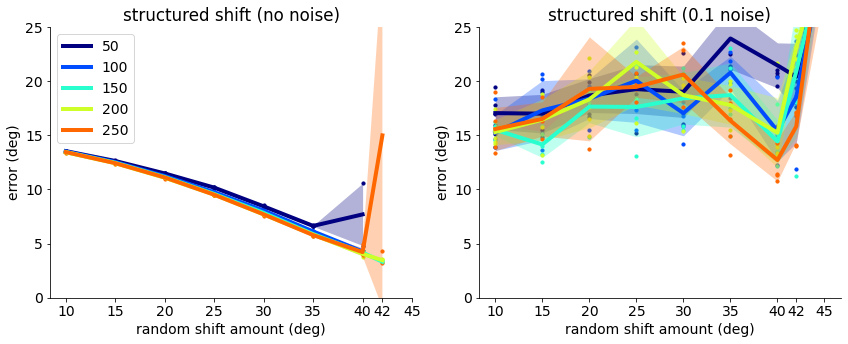

In [239]:
import matplotlib

dim_recurrent = 100
shift_amounts = [10, 15, 20, 25, 30, 35, 40, 42, 45]
randoms = [1, 2, 3, 4, 5]
best_errors = torch.zeros(len(randoms), len(shift_amounts))
final_errors = torch.zeros(len(randoms), len(shift_amounts))

network, label, color = "schange", "schange of tuning", "k"
fig = plt.figure(figsize=(12, 5))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
ax_f = fig.add_subplot(1, 2, 1)
ax_b = fig.add_subplot(1, 2, 2)

def _plot(dim_recurrent, label, color):
    for i, shift_amount in enumerate(shift_amounts):
        for j, random in enumerate(randoms):
            directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}_sa{shift_amount:.1f}_r{random}/"
            if not os.path.exists(f"{directory}info.json"):
                final_errors[j, i] = float('nan')
                best_errors[j, i] = float('nan')
                print("NO ", directory)
                continue
            with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
                js = json.load(f)
            final_errors[j, i] = js["errors"][2]
            best_errors[j, i] = js["errors"][10] 
    #final_errors[final_errors>20] = float('nan')
    #best_errors[best_errors>20] = float('nan')
    #print(final_errors)
    # plot
    mean = torch.nanmean(best_errors, dim=0) 
    sd = (torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5
    ax_b.scatter(torch.tensor(shift_amounts).repeat(len(randoms), 1), best_errors, 10, color=color)
    ax_b.fill_between(shift_amounts, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_b.plot(shift_amounts, mean, "-", linewidth=4, label=label, color=color)
    mean = torch.nanmean(final_errors, dim=0) 
    sd = (torch.nanmean(final_errors**2, dim=0)-mean**2)**0.5
    ax_f.scatter(torch.tensor(shift_amounts).repeat(len(randoms), 1), final_errors, 10, color=color)
    ax_f.fill_between(shift_amounts, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_f.plot(shift_amounts, mean, "-", linewidth=4, label=label, color=color)
colors = matplotlib.colors.Colormap("rainbow", N=6)
colors = plt.cm.jet(np.linspace(0,1,6))
for j, a in enumerate([50, 100, 150, 200, 250]):
#for j, a in enumerate([200]):
    _plot(a, str(a), colors[j])
    
#if show_line: ax.axhline(y=0.0, color='r', linestyle='--', linewidth=3)
#ax.set_ylim(-ylim, ylim)
#ax.set_xlim(-90, 90)
ax_f.set_title(f"structured shift (no noise)")
ax_b.set_title(f"structured shift (0.1 noise)")
ax_f.set_xlabel(f"random shift amount (deg)")
ax_b.set_xlabel(f"random shift amount (deg)")
ax_f.set_ylabel("error (deg)")
ax_b.set_ylabel("error (deg)")
ax_f.spines['top'].set_visible(False)
ax_f.spines['right'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_f.legend(loc=2)
#ax_b.legend(loc=1)
ax_f.set_xticks(shift_amounts)
ax_b.set_xticks(shift_amounts)
ax_f.set_ylim(0, 25)
ax_b.set_ylim(0, 25)
plt.tight_layout()
print("network size is 100")
plt.show()